In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import set_config
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
pd.options.display.float_format = '{:.2f}'.format
set_config(display="diagram")

In [3]:
from dataset.world_bank import CountyDataSet
dataset = CountyDataSet(country_code='UKR')                   # Вибираємо датасет тільки по Україні
data = dataset.by_indicator_names.T                           # Записуємо в новий датафрейм дані по іменем і транспонуємо(індекси - роки)
indicator = 'GDP (constant LCU)'                              # Створюємо новий ідентифікатор 
gdp = data[indicator]                                         # Створюємо обєкт типу Series по такому ідентифікатору 
gdp.index = pd.to_datetime(gdp.index)                         # Перетворює індекси в об'єкт дати та часу
df = pd.DataFrame(list(gdp.items()), columns=['Date', 'GDP']) # Складаємо в новий датафрейм обєкт типу Series з полями Date та GDP
df.set_index('Date', inplace = True)                          # Встановлює індекс датафрейму на стовпець Data, (inplace = True) - змінює індекс у поточному датафреймі без створення нового

In [4]:
df = df.dropna()                                              # Видаляє всі пусті значення

In [5]:
df

,GDP
Date,
1987-01-01,4139940476000.00
1988-01-01,4246190527700.00
1989-01-01,4410649869400.00
1990-01-01,4130783764500.00
1991-01-01,3771405577000.00
1992-01-01,3398036424800.00
1993-01-01,2915515252500.00
1994-01-01,2247862259700.00
1995-01-01,1973623064000.00


In [6]:
df_GDP = df['GDP']                                            # Витягуємо колонку 'GDP' з DataFrame df і зберегаємо її у змінну df_GDP                 

In [7]:
                                                                    # Створюємо новий DataFrame зі стовпцями 'GDP', 'GDP 1 year ago', 'GDP 2 years ago'
time_series_df = pd.DataFrame({'GDP': df_GDP,                       # 'GDP': оригінальні дані про ВВП
                               'GDP 1 year ago': df_GDP.shift(1),   # 'GDP 1 year ago': дані про ВВП з попереднього року (зсув на 1 рік)
                               'GDP 2 years ago': df_GDP.shift(2)   # 'GDP 2 years ago': дані про ВВП з два роки тому (зсув на 2 роки)
                               })
time_series_df.dropna(inplace = True)                               # Видаляємо пусті значення
time_series_df                                                      # Виводим датафрейм

,GDP,GDP 1 year ago,GDP 2 years ago
Date,,,
1989-01-01,4410649869400.00,4246190527700.00,4139940476000.00
1990-01-01,4130783764500.00,4410649869400.00,4246190527700.00
1991-01-01,3771405577000.00,4130783764500.00,4410649869400.00
1992-01-01,3398036424800.00,3771405577000.00,4130783764500.00
1993-01-01,2915515252500.00,3398036424800.00,3771405577000.00
1994-01-01,2247862259700.00,2915515252500.00,3398036424800.00
1995-01-01,1973623064000.00,2247862259700.00,2915515252500.00
1996-01-01,1776260757600.00,1973623064000.00,2247862259700.00
1997-01-01,1722972934900.00,1776260757600.00,1973623064000.00


In [26]:
def DistributionPlot(YellowFunction, BlueFunction, YellowName, BlueName, Title):
    # Створення фігури розміром 12x10 дюймів
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    # Графік розподілу для YellowFunction з жовтим кольором та назвою YellowName
    ax1 = sns.distplot(YellowFunction, hist=False, color="y", label=YellowName)
    
    # Графік розподілу для BlueFunction з синім кольором та назвою BlueName, який відображається на тому ж графіку (ax1)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    # Встановлення заголовка графіку
    plt.title(Title)
    
    # Встановлення назви осі x
    plt.xlabel('GDP')
    
    # Встановлення назви осі y
    plt.ylabel('Proportion of GDP')

    # Показ графіку
    plt.show()
    
    # Закриття графіку
    plt.close()

In [158]:
time_series_df.corr()       # Обчислюємо матрицю кореляції

,GDP,GDP 1 year ago,GDP 2 years ago
GDP,1.00,0.93,0.82
GDP 1 year ago,0.93,1.00,0.95
GDP 2 years ago,0.82,0.95,1.00


In [8]:
y_data = time_series_df['GDP']      # Присвоюємо значення стовпця 'GDP' з DataFrame time_series_df

In [9]:
y_data

Date
1989-01-01   4410649869400.00
1990-01-01   4130783764500.00
1991-01-01   3771405577000.00
1992-01-01   3398036424800.00
1993-01-01   2915515252500.00
1994-01-01   2247862259700.00
1995-01-01   1973623064000.00
1996-01-01   1776260757600.00
1997-01-01   1722972934900.00
1998-01-01   1690236449100.00
1999-01-01   1686855976200.00
2000-01-01   1786380478800.00
2001-01-01   1943581961000.00
2002-01-01   2047362380900.00
2003-01-01   2242201871200.00
2004-01-01   2506677486300.00
2005-01-01   2583663327100.00
2006-01-01   2779283348700.00
2007-01-01   3007624945500.00
2008-01-01   3075100758400.00
2009-01-01   2609639118900.00
2010-01-01   2716425665600.00
2011-01-01   2864342671100.00
2012-01-01   2868705493700.00
2013-01-01   2870009007500.00
2014-01-01   2580743813600.00
2015-01-01   2328528050700.00
2016-01-01   2385367000000.00
2017-01-01   2441661000000.00
2018-01-01   2526834982800.00
2019-01-01   2607681165700.00
2020-01-01   2509820000000.00
2021-01-01   2596299000000.00
2022-

In [10]:
x_data=time_series_df.drop('GDP',axis=1)        # Присвоюємо змінній x_data датафрейм time_series_df без стовпця 'GDP', (axis=1) - вказує що ми хочемо видалити стовпець, а не рядок

In [11]:
x_data                                          # Виводимо дані

,GDP 1 year ago,GDP 2 years ago
Date,,
1989-01-01,4246190527700.00,4139940476000.00
1990-01-01,4410649869400.00,4246190527700.00
1991-01-01,4130783764500.00,4410649869400.00
1992-01-01,3771405577000.00,4130783764500.00
1993-01-01,3398036424800.00,3771405577000.00
1994-01-01,2915515252500.00,3398036424800.00
1995-01-01,2247862259700.00,2915515252500.00
1996-01-01,1973623064000.00,2247862259700.00
1997-01-01,1776260757600.00,1973623064000.00


In [13]:
# Використовуємо функцію train_test_split для розбиття даних на навчальний та тестовий набори
x_train, x_test, y_train, y_test = train_test_split(x_data,          # Містить набір ознак (незалежних змінних), які будуть використовуватися для прогнозування.
                                                    y_data,          # Містить цільову змінну (залежну змінну), яку ви хочете прогнозувати
                                                    test_size=0.37,  # Вказує, що 37% даних буде використовуватися для тестування, а решта - для навчання
                                                    shuffle=False)   # Вказує, що дані не будуть перемішані, а залишаться відсортованими за датою
# Вивід кількості тестових та тренувальних зразків
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 13
number of training samples: 21


In [14]:
lr = LinearRegression()                                             # Створення моделі лінійної регресії
lr.fit(x_train[['GDP 1 year ago', 'GDP 2 years ago']], y_train)     # Тренування моделі на тренувальних даних

# LinearRegression() - це клас для лінійної регресії в бібліотеці scikit-learn.
# Ми створюємо об'єкт моделі і викликаємо fit() для навчання моделі на тренувальних даних.
# x_train[['GDP 1 year ago', 'GDP 2 years ago']] - це дані ознак для тренування, 
# y_train - це цільові значення (в данному випадку, значення GDP).

LinearRegression()

In [15]:
yhat_train = lr.predict(x_train[['GDP 1 year ago', 'GDP 2 years ago']])     # Прогнозування значень на тренувальних даних
                                                                            # lr.predict() використовує навчену модель для прогнозування значень
                                                                            # на основі введених ознак (x_train[['GDP 1 year ago', 'GDP 2 years ago']]).
                                                                            # yhat_train містить прогнозовані значення, які модель генерує для тренувальних даних.
yhat_train                                                                  # Вивід масиву

array([4.09805392e+12, 4.28580547e+12, 3.71420970e+12, 3.33875139e+12,
       2.99877542e+12, 2.49291574e+12, 1.76807166e+12, 1.81310774e+12,
       1.69492725e+12, 1.75305702e+12, 1.73914930e+12, 1.75759749e+12,
       1.92063226e+12, 2.10158499e+12, 2.15423960e+12, 2.39280773e+12,
       2.67723705e+12, 2.60833845e+12, 2.86772948e+12, 3.09329256e+12,
       3.03543377e+12])

In [16]:
yhat_test = lr.predict(x_test[['GDP 1 year ago', 'GDP 2 years ago']])       # Прогнозування значень на тестових даних
                                                                            # lr.predict() використовує навчену модель для прогнозування значень
                                                                            # на основі введених ознак (x_test[['GDP 1 year ago', 'GDP 2 years ago']]).
                                                                            # yhat_test містить прогнозовані значення, які модель генерує для тестових даних.
                                                                            # Ці значення можна порівняти з реальними y_test для оцінки ефективності моделі.
yhat_test                                                                   # Вивід масиву

array([2.23522084e+12, 2.74735304e+12, 2.90802451e+12, 2.80706393e+12,
       2.80598149e+12, 2.33834749e+12, 2.14264088e+12, 2.41849264e+12,
       2.46781377e+12, 2.56412594e+12, 2.63236964e+12, 2.41545802e+12,
       2.62642959e+12])

In [17]:
predicted_data = time_series_df                                             # Записуємо в змінну predicted_data дані з time_series_df

In [18]:
result = np.concatenate((yhat_train, yhat_test), axis=0)                    # Об'єднання прогнозованих значень для тренувального та тестового періодів
                                                                            # result містить прогнозовані значення для всього періоду, об'єднуючи
                                                                            # значення, які були здобуті під час тренування моделі та тестування на нових даних.


In [19]:
predicted_data['train_data'] = result                                       # Додавання стовпця 'train_data' до DataFrame predicted_data

columns_to_drop = ['GDP 1 year ago', 'GDP 2 years ago']
predicted_data = predicted_data.drop(columns=columns_to_drop)               # Вилучення непотрібних стовпців 'GDP 1 year ago' та 'GDP 2 years ago'

                                                                            # Тут створюється новий стовпець 'train_data', який містить прогнозовані значення,
                                                                            # а потім видаляються непотрібні стовпці 'GDP 1 year ago' та 'GDP 2 years ago'.

<Figure size 1500x700 with 0 Axes>

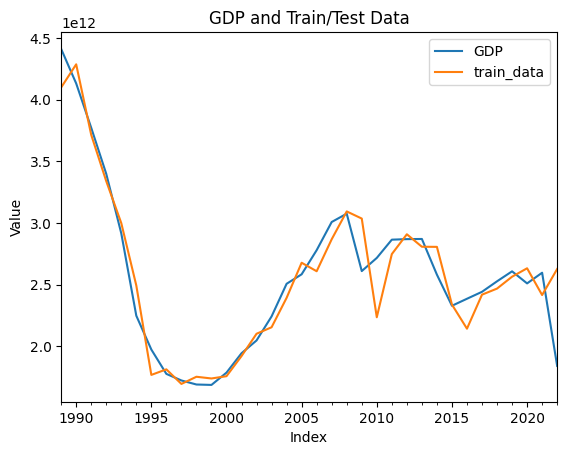

In [24]:
width = 15
height = 7
plt.figure(figsize=(width, height))   # Задання розмірів графіку

predicted_data.plot()                 # Побудова графіків для всіх стовпців у DataFrame predicted_data

                                      # Додавання підписів до осей та заголовку графіку
plt.xlabel('Index')                   # Позначення осі X (індекси даних)
plt.ylabel('Value')                   # Позначення осі Y (значення)
plt.title('GDP and Train/Test Data')  # Заголовок графіку

plt.legend()                          # Додавання легенди для відображення відповідності кожного графіку

plt.show()                            # Відображення графіку


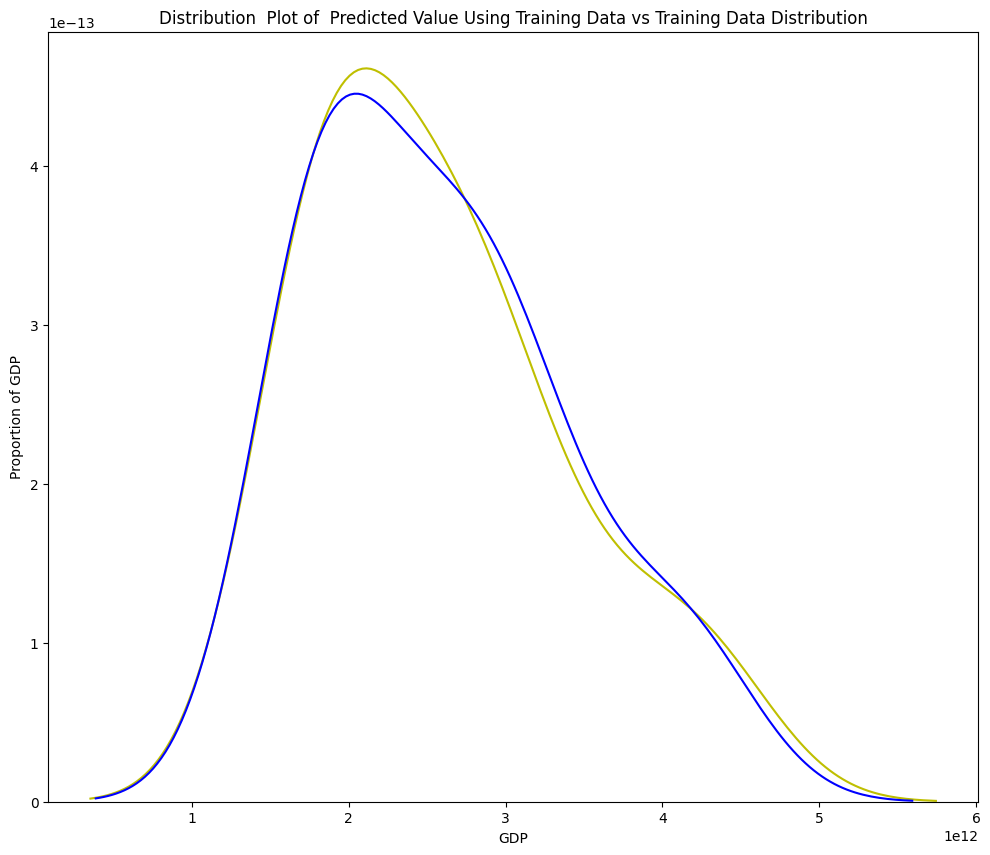

In [27]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'      # Заголовок графіку
DistributionPlot(
                 y_train,                            # Реальні значення (навчальні дані).
                 yhat_train,                         # Передбачені значення для навчальних даних.
                 "Actual Values (Train)",            # Назва для легенди, що вказує на реальні значення на графіку.
                 "Predicted Values (Train)",         # Назва для легенди, що вказує на передбачені значення на графіку.
                 Title                               # Заголовок графіку.
                 )                              

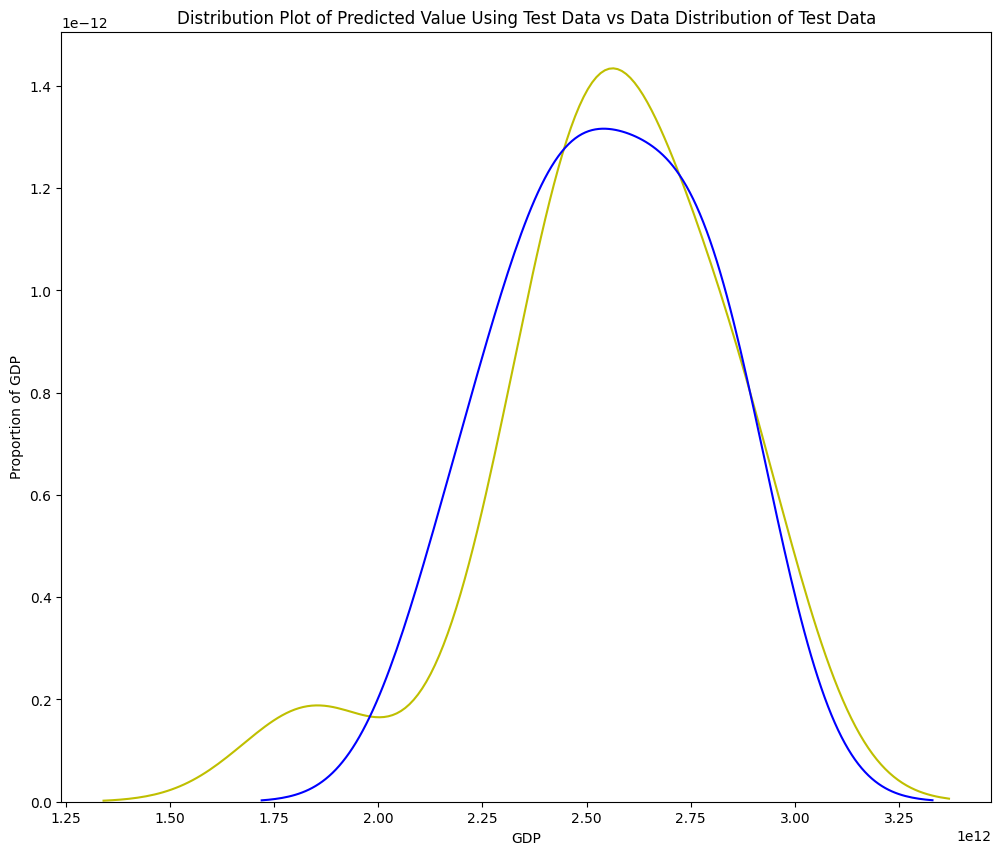

In [29]:
Title_test = 'Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'   # Заголовок графіку

# Виклик функції DistributionPlot для тестових даних
DistributionPlot(
    y_test,                     # Реальні значення (тестові дані).
    yhat_test,                  # Передбачені значення для тестових даних.
    "Actual Values (Test)",     # Назва для легенди, що вказує на реальні значення на графіку.
    "Predicted Values (Test)",  # Назва для легенди, що вказує на передбачені значення на графіку.
    Title_test                  # Заголовок графіку.
)

In [30]:
pr = PolynomialFeatures(degree=4)                               # Використання PolynomialFeatures для створення поліноміальних ознак
x_train_pr = pr.fit_transform(x_train[['GDP 1 year ago']])      # Трансформація навчальних даних для створення поліноміальних ознак
x_test_pr = pr.fit_transform(x_test[['GDP 1 year ago']])        # Трансформація тестових даних для створення поліноміальних ознак
pr                                                              # Вивід

PolynomialFeatures(degree=4)

In [31]:
x_train_pr

array([[1.00000000e+00, 4.24619053e+12, 1.80301340e+25, 7.65593842e+37,
        3.25085732e+50],
       [1.00000000e+00, 4.41064987e+12, 1.94538323e+25, 8.58040428e+37,
        3.78451590e+50],
       [1.00000000e+00, 4.13078376e+12, 1.70633745e+25, 7.04851104e+37,
        2.91158750e+50],
       [1.00000000e+00, 3.77140558e+12, 1.42235000e+25, 5.36425873e+37,
        2.02307953e+50],
       [1.00000000e+00, 3.39803642e+12, 1.15466515e+25, 3.92359425e+37,
        1.33325162e+50],
       [1.00000000e+00, 2.91551525e+12, 8.50022919e+24, 2.47825478e+37,
        7.22538962e+49],
       [1.00000000e+00, 2.24786226e+12, 5.05288474e+24, 1.13581889e+37,
        2.55316442e+49],
       [1.00000000e+00, 1.97362306e+12, 3.89518800e+24, 7.68763287e+36,
        1.51724895e+49],
       [1.00000000e+00, 1.77626076e+12, 3.15510228e+24, 5.60428436e+36,
        9.95467039e+48],
       [1.00000000e+00, 1.72297293e+12, 2.96863573e+24, 5.11487902e+36,
        8.81279812e+48],
       [1.00000000e+00, 1.6902

In [32]:
poly = LinearRegression()         # Це об'єкт лінійної регресії, навчений на трансформованих навчальних даних
poly.fit(x_train_pr,              # Трансформовані навчальні дані з поліноміальними ознаками
         y_train                  # Реальні значення для навчання моделі
         )    

LinearRegression()

In [33]:
yhat = poly.predict(x_test_pr)  # У цьому коді використовується навчена модель poly, 
                                # щоб здійснити передбачення на тестових даних, які були попередньо трансформовані з використанням поліноміальних ознак. 
                                # Результат передбачення зберігається у змінній yhat.
yhat                            # Вивід

array([2.44192614e+12, 2.53219386e+12, 2.66327132e+12, 2.66723722e+12,
       2.66842320e+12, 2.41816985e+12, 2.22375826e+12, 2.26547469e+12,
       2.30801571e+12, 2.37463842e+12, 2.44030721e+12, 2.36111599e+12,
       2.43092230e+12])

In [41]:
poly_graph = LinearRegression()                                                 # poly_graph - це об'єкт моделі лінійної регресії з бібліотеки scikit-learn.
poly_graph.fit(x_train_pr, y_train)                                             # Навчання моделі лінійної регресії на навчальних даних, які мають поліноміальні ознаки.
ytrain_predict = poly_graph.predict(x_train_pr)                                 # Передбачені значення для навчальних даних на основі навченої моделі.
ytest_predict = poly_graph.predict(x_test_pr)                                   # Передбачені значення для тестових даних на основі навченої моделі.

Polynomial_prediction = time_series_df                                          # DataFrame, що містить дані про GDP та буде оновлено з передбаченнями поліноміальної регресії.
Polynomial_prediction

# Polynomial_prediction = predicted_data.drop(columns=['GDP 1 year ago', 'GDP 2 years ago'])
polynomial_result = np.concatenate((ytrain_predict, ytest_predict), axis=0)     # Результат передбачення для всіх даних (навчальних та тестових), об'єднаних для подальшого використання.

Polynomial_prediction['Polynomial prediction'] = polynomial_result              # Нова колонка, яка буде містити передбачені значення за допомогою поліноміальної регресії.
cols = ['GDP 1 year ago', 'GDP 2 years ago']                                    # cols - список з колонок, які потрібно видалити з DataFrame.
Polynomial_prediction = Polynomial_prediction.drop(columns=cols)                # Видалення вказаних колонок з DataFrame.
Polynomial_prediction                                                           # Вивід

,GDP,train_data,Polynomial prediction
Date,,,
1989-01-01,4410649869400.00,4098053924817.40,4040112005720.16
1990-01-01,4130783764500.00,4285805473761.45,4190865611977.17
1991-01-01,3771405577000.00,3714209703248.76,3929063771642.86
1992-01-01,3398036424800.00,3338751385447.40,3566101732115.75
1993-01-01,2915515252500.00,2998775423379.22,3181631727960.15
1994-01-01,2247862259700.00,2492915742440.62,2710127539839.09
1995-01-01,1973623064000.00,1768071662504.84,2166734300586.89
1996-01-01,1776260757600.00,1813107741458.46,1992681815197.16
1997-01-01,1722972934900.00,1694927253661.14,1886913084222.54


<Axes: xlabel='Date'>

<Figure size 1200x500 with 0 Axes>

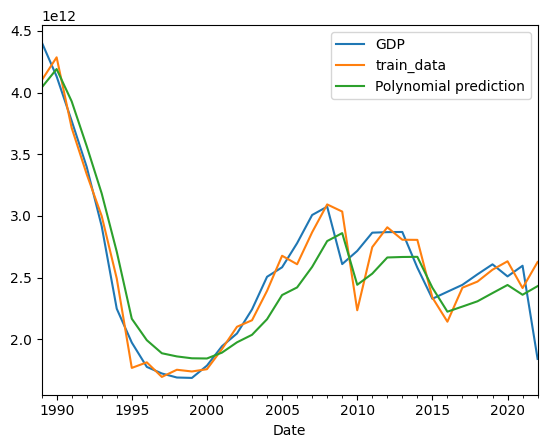

In [43]:
# width і height - розміри графіку.
width = 12
height = 5

plt.figure(figsize=(width, height))     # Створення фігури з вказаними розмірами для подальшого малювання графіків.
Polynomial_prediction.plot()            # Побудова графіка на основі даних у DataFrame Polynomial_prediction.

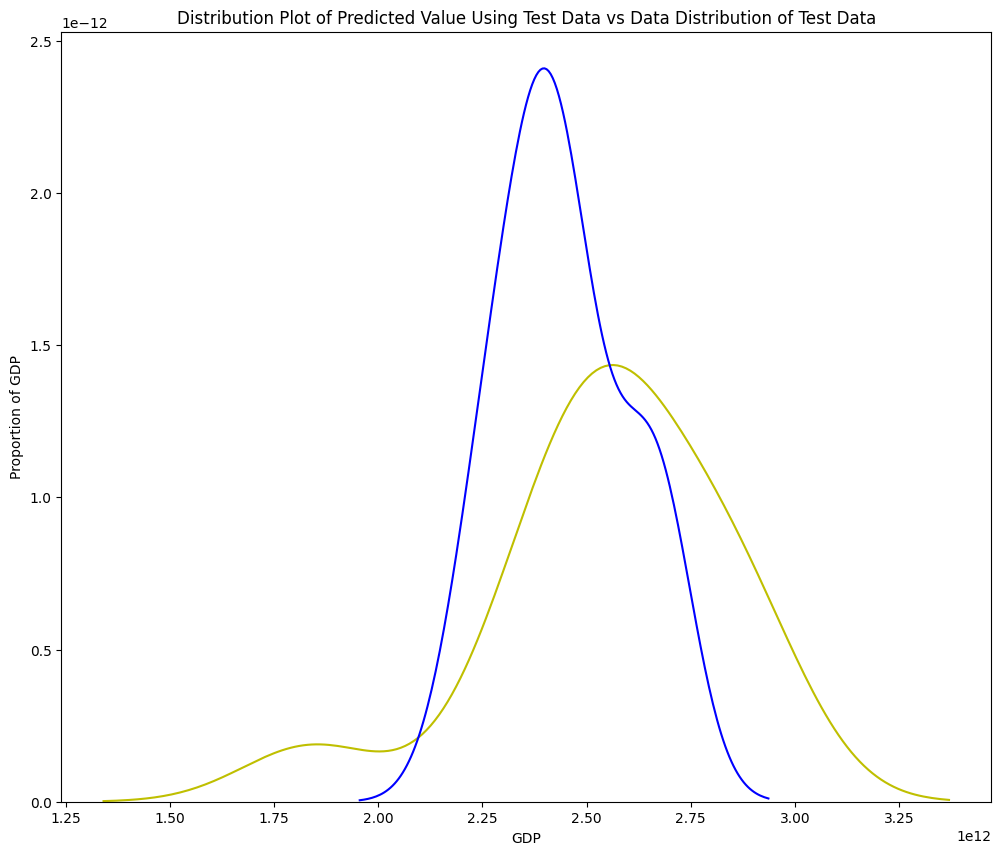

In [44]:
Title = 'Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'     # Заголовок

DistributionPlot(
    y_test,                     # Реальні значення тестових даних.
    ytest_predict,              # Передбачені значення для тестових даних.
    "Actual Values (Test)",     # Назва для легенди, що вказує на реальні значення на графіку.
    "Predicted Values (Test)",  # Назва для легенди, що вказує на передбачені значення на графіку.
    Title                       # Заголовок графіку.
)

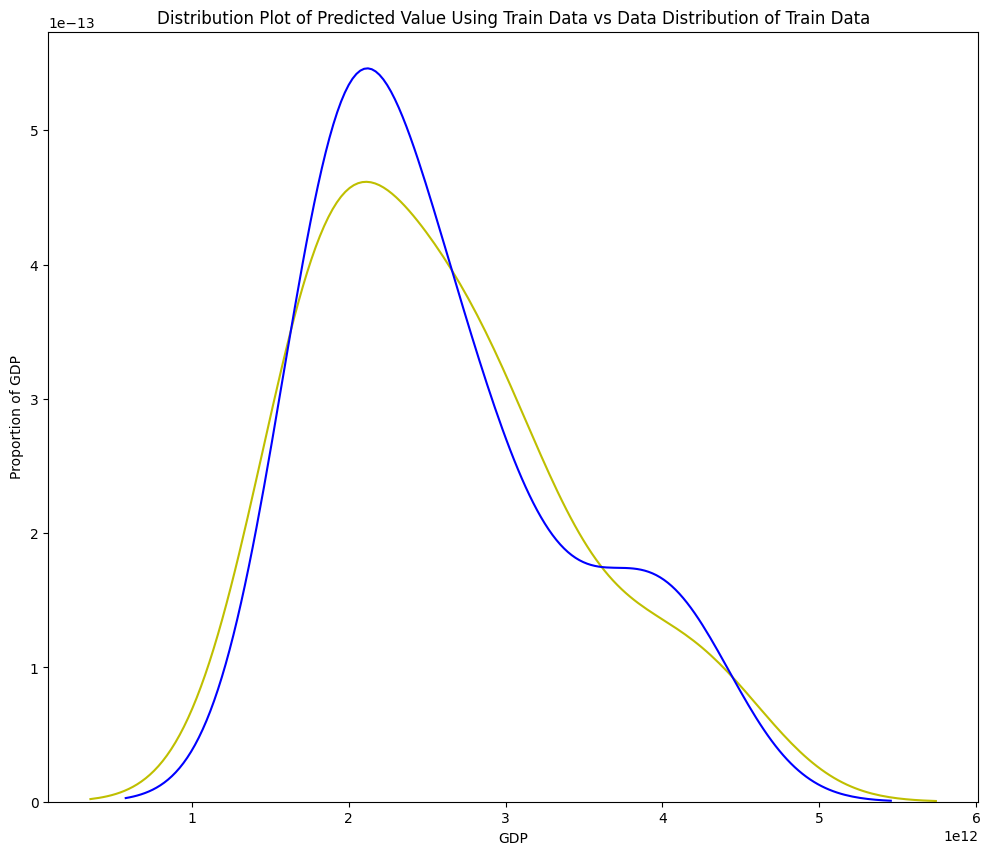

In [46]:
Title = 'Distribution Plot of Predicted Value Using Train Data vs Data Distribution of Train Data'

DistributionPlot(
    y_train,                    # Реальні значення навчальних даних.
    ytrain_predict,             # Передбачені значення для навчальних даних.
    "Actual Values (Train)",    # Назва для легенди, що вказує на реальні значення на графіку.
    "Predicted Values (Train)", # Назва для легенди, що вказує на передбачені значення на графіку.
    Title                       # Заголовок графіку.
)